In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import re
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [31]:
featuresPath = 'transcripts_features.csv'

In [52]:
features = pd.read_csv(featuresPath)

In [32]:
features.head()

,Unnamed: 0,voice_filename,transcript,accent,gender,tone,mfcc_mean,chroma_mean,contrast_mean,centroid_mean,bandwidth_mean,zero_crossings_mean,pitch_mean,formants_mean,energy,tempo,meanfreq,dfrange,median
0,0,voice_1.mp3,چرا این‌‌‌‌طور فکر می‌‌‌‌کنی؟,فارسی,male,question,[-226.45906 27.234396 -4.854726 1...,[0.631335 0.5893609 0.59790057 0.6132906 0...,[27.92413731 12.36858302 15.13017475 15.271798...,3002.330924,2087.859977,0.304001,188.273514,2.946813e-07,56.331367,267.857143,3002.330924,2032.816684,2894.636224
1,1,voice_2.mp3,همیشه من و تو راجع به آن با هم صحبت کرده‌‌‌‌ایم,فارسی,male,normal,[-341.25583 -10.133878 5.558397 17.9...,[0.38676995 0.33763474 0.3399514 0.38050535 0...,[27.67936516 14.14293756 17.84834701 18.141986...,3716.514567,2131.470004,0.415193,140.911057,-4.452772e-08,67.349335,110.294118,3716.514567,3120.362780,3665.778826
2,2,voice_3.mp3,دنیا در حال گذار به‌‌‌‌سمت پایداری است,فارسی,male,normal,[-308.26108 -7.790743 6.654821 9.6...,[0.40178165 0.3928808 0.37732053 0.48148748 0...,[27.21609872 13.85584494 18.61779162 20.051397...,3715.257064,2089.085343,0.427597,120.621613,4.354800e-08,90.469215,133.928571,3715.257064,4578.777198,3572.828536
3,3,voice_4.mp3,شاخصی که باید عملکرد تسلا را با آن اندازه بگیریم,فارسی,male,normal,[-324.18372 -12.081556 0.6377594 17.1...,[0.4548103 0.33421117 0.3522711 0.37673205 0...,[26.48621316 14.083843 18.3248408 18.592037...,3742.295518,1994.383106,0.423299,145.767975,-5.407027e-08,285.061188,93.750000,3742.295518,4627.715878,4017.854936
4,4,voice_5.mp3,باید تعداد واقعاً غیرقابل‌‌‌‌تصوری باتری تولید...,فارسی,male,normal,[-273.72803 4.334649 -1.7544707 1...,[0.4542341 0.41574174 0.44602737 0.4391814 0...,[27.70968228 13.96555351 18.92690269 18.205079...,3451.477394,2081.125187,0.387289,129.165787,-2.381880e-08,122.441605,156.250000,3451.477394,4766.202466,3391.330732


In [5]:
features.describe()

,Unnamed: 0,centroid_mean,bandwidth_mean,zero_crossings_mean,pitch_mean,formants_mean,energy,tempo,meanfreq,dfrange,median
count,6042.000000,6042.000000,6042.000000,6042.000000,6042.000000,6.042000e+03,6042.000000,6042.000000,6042.000000,6042.000000,6042.000000
mean,3020.500000,2946.353858,1830.851651,0.292715,89.425464,1.053165e-06,188.014545,120.076006,2946.353858,4244.921453,2752.160190
std,1744.319495,514.138135,238.574830,0.064070,31.073661,2.143524e-04,205.968974,29.535174,514.138135,633.412309,588.240329
min,0.000000,1211.383990,964.516766,0.111397,12.460518,-6.304739e-03,1.589549,49.342105,1211.383990,1643.985583,1100.756900
25%,1510.250000,2614.443391,1698.685016,0.249784,66.916609,-2.149903e-07,69.489637,98.684211,2614.443391,3821.057246,2349.709970
50%,3020.500000,2948.097080,1883.215322,0.283855,86.932137,-4.504545e-09,127.285854,117.187500,2948.097080,4236.487752,2734.152212
75%,4530.750000,3297.615054,2000.500074,0.329858,108.934307,2.635495e-08,228.906372,133.928571,3297.615054,4685.385443,3119.218118
max,6041.000000,4487.562284,2461.147785,0.554474,213.895767,3.697412e-03,2754.958984,312.500000,4487.562284,6585.751460,4754.210030


In [33]:
features['gender'].value_counts()

gender
male      4720
female    1322
Name: count, dtype: int64

In [53]:
X = features.drop(columns=['gender'])
y = features['gender']

stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [54]:
train_class_counts = y_train.value_counts()
test_class_counts = y_test.value_counts()

print("Training Set Class Counts:")
print(train_class_counts)
print("\nTesting Set Class Counts:")
print(test_class_counts)

Training Set Class Counts:
gender
male      3540
female     991
Name: count, dtype: int64

Testing Set Class Counts:
gender
male      1180
female     331
Name: count, dtype: int64


In [9]:
print(X_train['chroma_mean'].dtype)
print(X_train['contrast_mean'].dtype)

object
object


In [10]:
X_train.describe()

,Unnamed: 0,centroid_mean,bandwidth_mean,zero_crossings_mean,pitch_mean,formants_mean,energy,tempo,meanfreq,dfrange,median
count,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4.531000e+03,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000
mean,3007.928934,2952.598856,1834.282469,0.293119,89.568340,-3.684838e-07,186.722546,120.440481,2952.598856,4242.356451,2757.398886
std,1740.374556,506.671377,237.001735,0.063177,31.112383,2.404253e-04,203.149559,29.629338,506.671377,634.979689,580.380332
min,0.000000,1211.383990,964.516766,0.111397,12.460518,-6.304739e-03,1.589549,49.342105,1211.383990,1643.985583,1100.756900
25%,1511.000000,2627.908619,1709.002165,0.250791,66.880627,-2.623307e-07,69.927238,98.684211,2627.908619,3819.259254,2363.342209
50%,2999.000000,2951.787423,1888.433900,0.284359,86.918320,-4.480514e-09,127.908852,117.187500,2951.787423,4236.629754,2736.627264
75%,4510.500000,3298.698891,2000.063184,0.330043,109.147125,2.742334e-08,227.589302,133.928571,3298.698891,4689.352966,3119.818738
max,6041.000000,4487.562284,2461.088524,0.554474,213.895767,3.697412e-03,2754.958984,312.500000,4487.562284,6585.751460,4754.210030


In [36]:
print("X_train shape before expanding the columns")
X_train.shape 

X_train shape before expanding the columns


(4531, 18)

In [55]:
def parse_feature_column(df, column_name, num_columns):
    def parse_feature_mean(value):
        return [float(x) for x in re.findall(r'\d+\.\d+', value)][:num_columns]
        
    df[column_name] = df[column_name].apply(lambda x: parse_feature_mean(x))

    feature_columns = [f'{column_name}_{i+1}' for i in range(num_columns)]
    feature_df = df[column_name].apply(pd.Series)
    feature_df.columns = feature_columns

    df = pd.concat([df, feature_df], axis=1)

    df = df.drop(columns=[column_name])

    return df

num_mfcc_columns = 13
num_chroma_columns = 12
num_contrast_columns = 7

X_train = parse_feature_column(X_train.copy(), 'mfcc_mean', num_mfcc_columns)
X_test = parse_feature_column(X_test.copy(), 'mfcc_mean', num_mfcc_columns)

X_train = parse_feature_column(X_train.copy(), 'chroma_mean', num_chroma_columns)
X_test = parse_feature_column(X_test.copy(), 'chroma_mean', num_chroma_columns)

X_train = parse_feature_column(X_train.copy(), 'contrast_mean', num_contrast_columns)
X_test = parse_feature_column(X_test.copy(), 'contrast_mean', num_contrast_columns)

In [13]:
print("X_train shape after expanding the columns")
X_train.shape 

X_train shape after expanding the columns


(4531, 47)

In [56]:
columns_to_drop = ['voice_filename', 'transcript', 'accent', 'tone']
X_train = X_train.loc[:, ~X_train.columns.str.contains('^Unnamed')]
X_test = X_test.loc[:, ~X_test.columns.str.contains('^Unnamed')]

X_train = X_train.drop(columns=columns_to_drop, errors='ignore')
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

In [57]:
X_train

,centroid_mean,bandwidth_mean,zero_crossings_mean,pitch_mean,formants_mean,energy,tempo,meanfreq,dfrange,median,...,chroma_mean_10,chroma_mean_11,chroma_mean_12,contrast_mean_1,contrast_mean_2,contrast_mean_3,contrast_mean_4,contrast_mean_5,contrast_mean_6,contrast_mean_7
239,3194.507706,1847.934003,0.333683,133.091721,2.755703e-07,66.100021,98.684211,3194.507706,3627.190749,3229.658112,...,0.527890,0.608257,0.525412,22.794618,17.145426,18.854700,18.052710,18.950754,20.860792,53.424558
26,3489.838150,1823.236316,0.354415,86.952126,9.533868e-08,212.045639,104.166667,3489.838150,4927.064871,3291.699692,...,0.399025,0.357631,0.429300,29.884918,17.174467,20.448816,19.315168,21.400850,20.736469,53.583620
1190,3429.226932,1765.048949,0.326644,61.297367,-4.417741e-07,545.490845,125.000000,3429.226932,5073.649973,3061.969105,...,0.445260,0.334740,0.250823,21.890528,21.427644,21.502854,19.502796,20.163703,20.497308,52.465332
4219,3288.603462,2067.263885,0.312947,70.040390,-4.020689e-06,121.443047,156.250000,3288.603462,4851.313788,2690.307735,...,0.489781,0.358411,0.243517,21.659837,18.646262,19.974788,19.473765,19.047288,18.669307,52.007972
4901,3158.148241,2110.126731,0.245718,55.847904,-2.976724e-09,192.699524,85.227273,3158.148241,4231.248781,2912.808691,...,0.400128,0.265529,0.341716,35.351687,16.474394,18.050194,17.930245,17.707033,17.585922,53.545610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,2716.327028,1764.891752,0.247201,54.818226,-3.850314e-06,476.124146,93.750000,2716.327028,4937.748804,2213.559988,...,0.350497,0.417803,0.521798,26.939406,17.589886,20.962593,18.559597,19.412742,20.475411,50.524362
2086,3193.338406,2011.816629,0.320072,108.515289,-3.494555e-06,256.429230,110.294118,3193.338406,4792.730981,2721.647787,...,0.426047,0.404078,0.379276,24.676158,17.010533,16.338548,15.113023,17.485612,22.726113,52.713126
1763,2931.527414,1809.290327,0.277101,88.112808,-4.224161e-07,173.909241,117.187500,2931.527414,5082.443305,3031.252694,...,0.381620,0.450837,0.421485,27.943740,17.054284,19.871046,18.616428,19.570603,19.274187,56.152275
4471,3326.647416,2002.173237,0.330937,89.196365,-1.773792e-08,72.551575,93.750000,3326.647416,4406.380595,3545.115865,...,0.506536,0.496738,0.415849,34.565313,13.837199,16.323327,15.502673,16.864467,16.822600,52.309908


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [16]:
X_train_scaled.shape

(4531, 42)

## PCA Dimention reduction

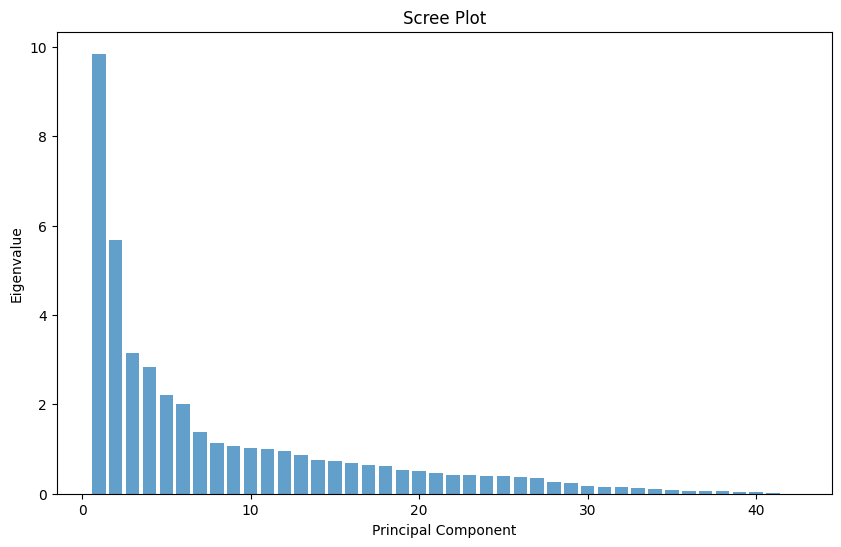

In [37]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Compute eigenvalues
eigenvalues = pca.explained_variance_

# Plot the eigenvalues
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.7, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

In [38]:
pca = PCA(n_components=8)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [39]:
X_train_pca.shape

(4531, 8)

## LDA Dimention reduction

In [19]:
X_train_scaled.shape

(4531, 42)

In [20]:
lda = LinearDiscriminantAnalysis(n_components=None)  # Set n_components to the desired number or leave as None
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

In [40]:
X_train_lda.shape

(4531, 1)

In [23]:
from sklearn.svm import SVC

# Support Vector Machine (SVM)

In [25]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

## PCA Results

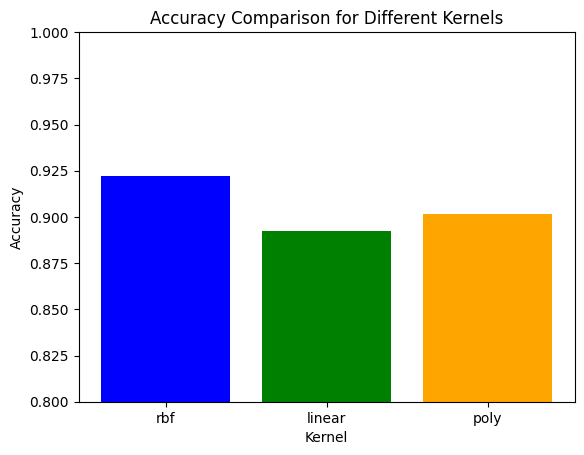

In [42]:
# Create and fit SVC models with different kernels
kernels = ['rbf', 'linear', 'poly']
models = {}

for kernel in kernels:
    svm_model = make_pipeline(SVC(kernel=kernel,probability=True))
    svm_model.fit(X_train_pca, y_train)
    y_pred = svm_model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    models[kernel] = {'model': svm_model, 'accuracy': accuracy}

# Plotting
kernels = list(models.keys())
accuracies = [info['accuracy'] for info in models.values()]

plt.bar(kernels, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Different Kernels')
plt.ylim(0.8, 1)  # Set y-axis limits to focus on the range from 0.9 to 1
plt.show()

In [43]:
svm_model = make_pipeline(SVC(kernel='rbf', probability=True))
svm_model.fit(X_train_pca, y_train)

y_pred = svm_model.predict(X_test_pca)

svm_accuracy = accuracy_score(y_test, y_pred)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", svm_accuracy)

Classification Report:
               precision    recall  f1-score   support

      female       0.87      0.76      0.81       331
        male       0.93      0.97      0.95      1180

    accuracy                           0.92      1511
   macro avg       0.90      0.86      0.88      1511
weighted avg       0.92      0.92      0.92      1511

Accuracy: 0.9219060225016545


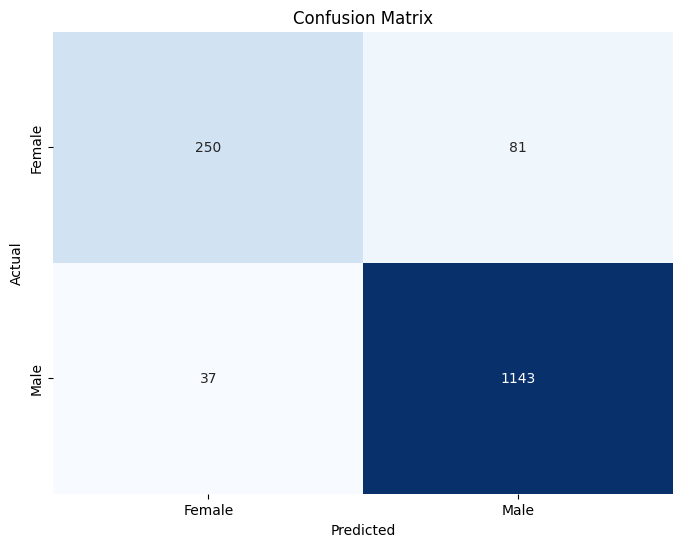

Classification Report:
               precision    recall  f1-score   support

      female       0.87      0.76      0.81       331
        male       0.93      0.97      0.95      1180

    accuracy                           0.92      1511
   macro avg       0.90      0.86      0.88      1511
weighted avg       0.92      0.92      0.92      1511

Accuracy: 0.9219060225016545


In [44]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display classification report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

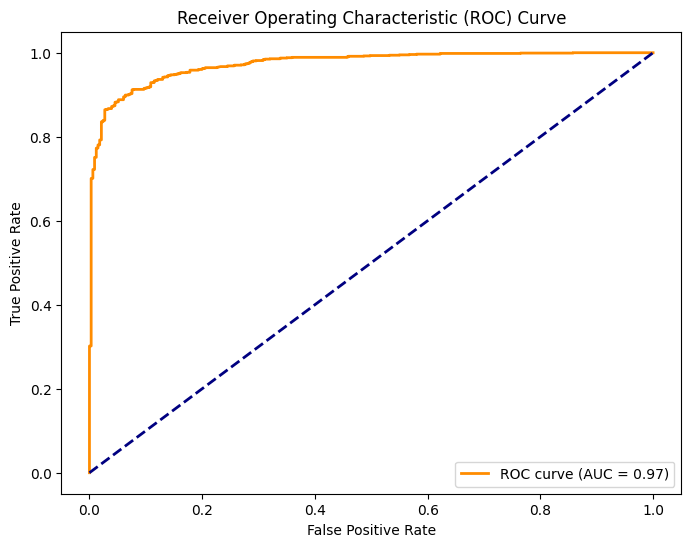

In [45]:
# Get predicted probabilities for the positive class
y_prob = svm_model.predict_proba(X_test_pca)[:, 1]

# Convert labels to binary form
label_binarizer = LabelBinarizer()
y_test_binary = label_binarizer.fit_transform(y_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## LDA Results

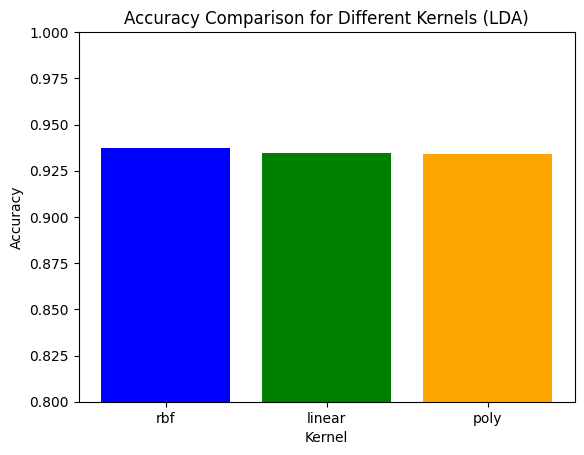

In [46]:
# Create and fit SVC models with different kernels
kernels = ['rbf', 'linear', 'poly']
models = {}

for kernel in kernels:
    svm_model = make_pipeline(SVC(kernel=kernel,probability=True))
    svm_model.fit(X_train_lda, y_train)
    y_pred = svm_model.predict(X_test_lda)
    accuracy = accuracy_score(y_test, y_pred)
    models[kernel] = {'model': svm_model, 'accuracy': accuracy}

# Plotting
kernels = list(models.keys())
accuracies = [info['accuracy'] for info in models.values()]

plt.bar(kernels, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Different Kernels (LDA)')
plt.ylim(0.8, 1)  # Set y-axis limits to focus on the range from 0.8 to 1
plt.show()

In [70]:
svm_model = make_pipeline(SVC(kernel='rbf', probability=True))
svm_model.fit(X_train_lda, y_train)

y_pred = svm_model.predict(X_test_lda)

svm_accuracy = accuracy_score(y_test, y_pred)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", svm_accuracy)

Classification Report:
               precision    recall  f1-score   support

      female       0.88      0.82      0.85       331
        male       0.95      0.97      0.96      1180

    accuracy                           0.94      1511
   macro avg       0.92      0.90      0.91      1511
weighted avg       0.94      0.94      0.94      1511

Accuracy: 0.9371277299801456


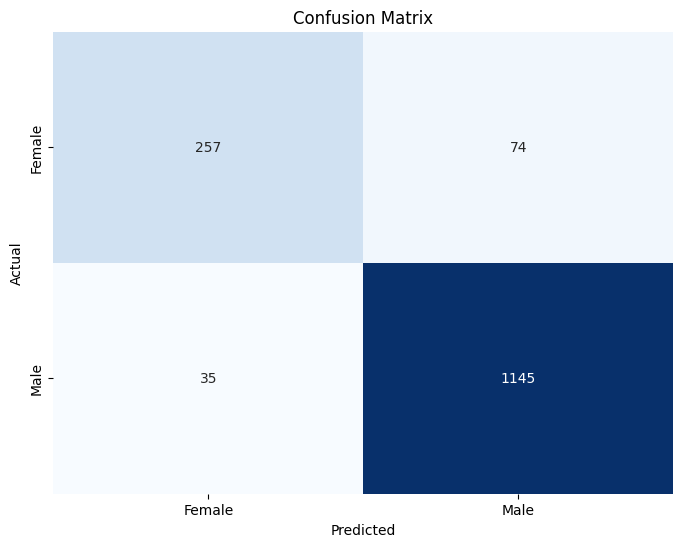

Classification Report:
               precision    recall  f1-score   support

      female       0.88      0.78      0.83       331
        male       0.94      0.97      0.95      1180

    accuracy                           0.93      1511
   macro avg       0.91      0.87      0.89      1511
weighted avg       0.93      0.93      0.93      1511

Accuracy: 0.927862342819325


In [56]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display classification report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

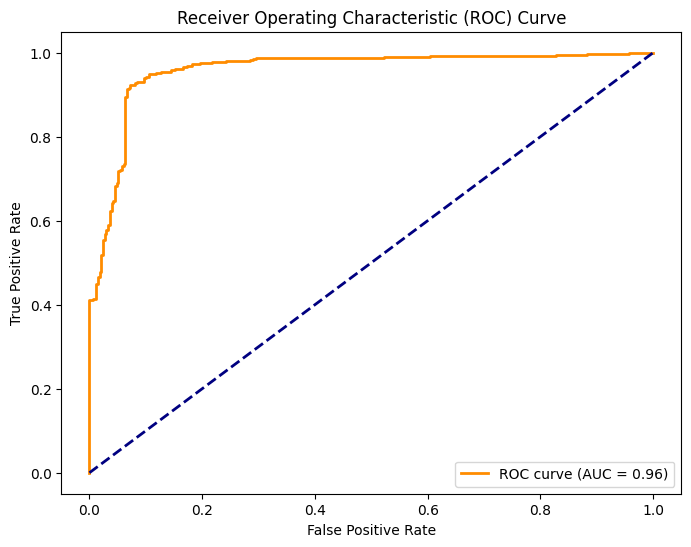

In [49]:
# Get predicted probabilities for the positive class
y_prob = svm_model.predict_proba(X_test_lda)[:, 1]

# Convert labels to binary form
label_binarizer = LabelBinarizer()
y_test_binary = label_binarizer.fit_transform(y_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [59]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_pca, y_train)

y_pred = rf_classifier.predict(X_test_pca)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

Classification Report:
               precision    recall  f1-score   support

      female       0.88      0.74      0.81       331
        male       0.93      0.97      0.95      1180

    accuracy                           0.92      1511
   macro avg       0.91      0.86      0.88      1511
weighted avg       0.92      0.92      0.92      1511

Accuracy: 0.9225678358702846


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

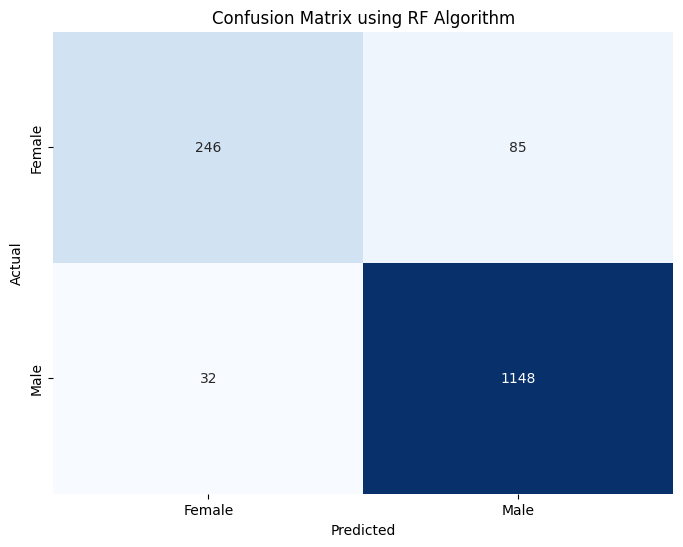

Classification Report:
               precision    recall  f1-score   support

      female       0.88      0.74      0.81       331
        male       0.93      0.97      0.95      1180

    accuracy                           0.92      1511
   macro avg       0.91      0.86      0.88      1511
weighted avg       0.92      0.92      0.92      1511

Accuracy: 0.9225678358702846


In [61]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title('Confusion Matrix using RF Algorithm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display classification report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

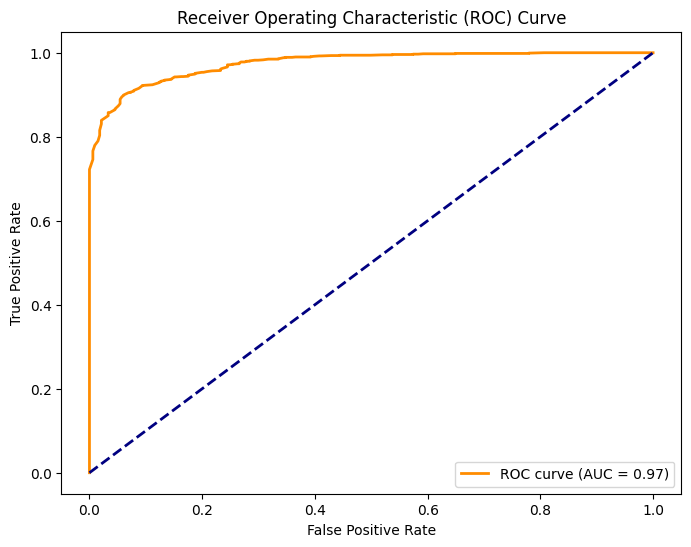

In [63]:
# Get predicted probabilities for the positive class
y_prob = rf_classifier.predict_proba(X_test_pca)[:, 1]

# Convert labels to binary form
label_binarizer = LabelBinarizer()
y_test_binary = label_binarizer.fit_transform(y_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Logistic regression

In [64]:
from sklearn.linear_model import LogisticRegression

In [114]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit_transform(X_test)

In [65]:
# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model on the training data
logreg_model.fit(X_train_pca, y_train)

# Make predictions on the testing data
y_pred_logreg = logreg_model.predict(X_test_pca)

# Evaluate the model
print("Classification Report for logistic regression:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

Classification Report for logistic regression:
               precision    recall  f1-score   support

      female       0.88      0.74      0.81       331
        male       0.93      0.97      0.95      1180

    accuracy                           0.92      1511
   macro avg       0.91      0.86      0.88      1511
weighted avg       0.92      0.92      0.92      1511

Accuracy: 0.8888153540701522


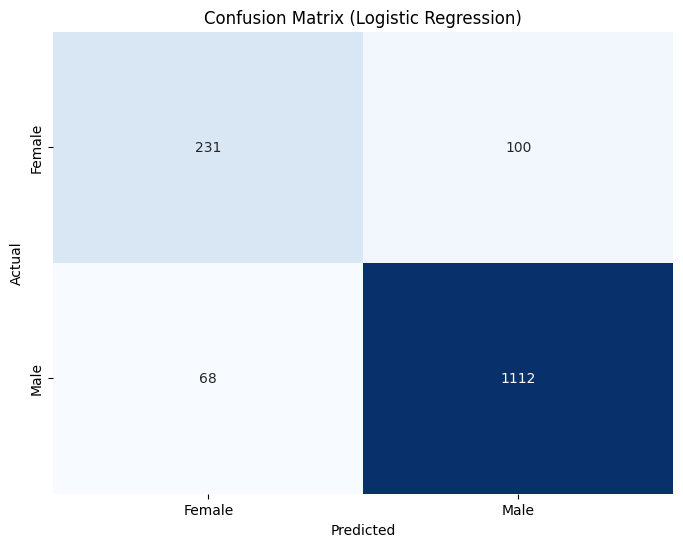

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

      female       0.77      0.70      0.73       331
        male       0.92      0.94      0.93      1180

    accuracy                           0.89      1511
   macro avg       0.85      0.82      0.83      1511
weighted avg       0.89      0.89      0.89      1511

Accuracy (Logistic Regression): 0.8888153540701522


In [66]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

log_reg_accuracy = accuracy_score(y_test, y_pred_logreg)
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_logreg))
print("Accuracy (Logistic Regression):", log_reg_accuracy)

# Compare 3 algoritms

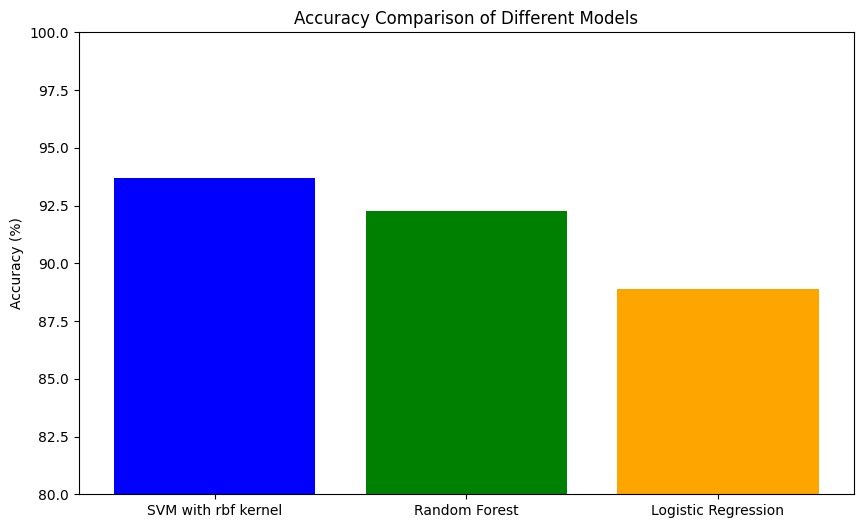

In [72]:
svm_accuracyy = svm_accuracy*100
random_forest_accuracy = rf_accuracy*100
logistic_regression_accuracy = log_reg_accuracy*100

# Titles and corresponding values
titles = ["SVM with rbf kernel", "Random Forest", "Logistic Regression"]
values = [svm_accuracyy, random_forest_accuracy, logistic_regression_accuracy]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(titles, values, color=['blue', 'green', 'orange'])
plt.ylim(80, 100)  # Set the y-axis limit to 100 for percentage values
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Different Models')
plt.show()